# Fixed occupation rate analysis

In [1]:
import sys
path = '/Users/Rob/work/pneumoinfer'
sys.path.append(path+ '/source/') 
from pneumoinfer import pneumoinfer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
nstat = 10
pn = pneumoinfer('fixed',nstat)

In [3]:
kmu = 1.0
param_dic = {
    'Curr'  : 0,
    'npast' : np.zeros(nstat),
    'Lam'   : np.random.gamma(kmu,1.0/kmu,size=nstat),#np.ones(nstat),
    'mu'    : np.random.gamma(kmu,1.0/kmu,size=nstat),#np.ones(nstat),
    'f'     : np.random.gamma(kmu,1.0/kmu,size=nstat),#np.ones(nstat),
    'eps'   : 1.0/5.0,
    'sig'   : 1.0,
    'mumax' : 1.0
}

#param_dic['vef'] = 0.5*np.ones(nstat)
#param_dic['vt'] = -np.ones(nstat)
#param_dic['vt'][4] = 2.0

In [4]:
pn.create_members(1,param_dic)

In [5]:
nreals = 1000
times = [0.2*float(i) + 0.1 for i in range(0,80)]
pn.run_ode(20.0,0.001)
pn.run_sim(nreals,20.0,0.01,time_snaps=times)

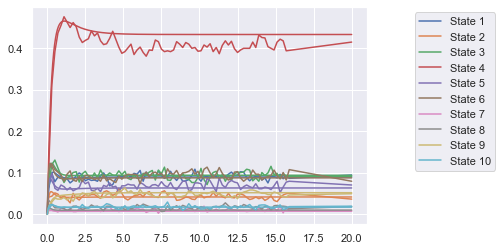

In [6]:
colours = sns.color_palette()
probs = []
for t in times:
    counts = pd.Series(pn.sim_output['Curr'][t].flatten()).value_counts()
    pr = np.zeros(11) 
    pr[counts.index.values.astype(int)] = counts.values/float(nreals)
    probs.append(list(pr))
for i in range(0,10):
    plt.plot(times,np.asarray(probs)[:,i+1],label='State '+str(i+1),color=colours[i])
    plt.plot(pn.ode_output['time'],pn.ode_output['probCurr'][:,i],color=colours[i])
plt.legend(bbox_to_anchor=(1.4,1.0))
plt.show()

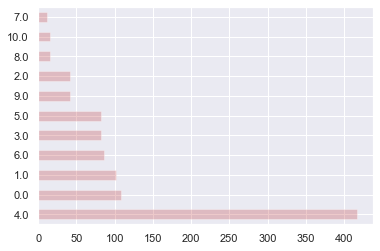

In [7]:
t = times[60]
pd.Series(pn.sim_output['Curr'][t].flatten()).value_counts().plot.barh(color='r',alpha=0.3)
plt.show()

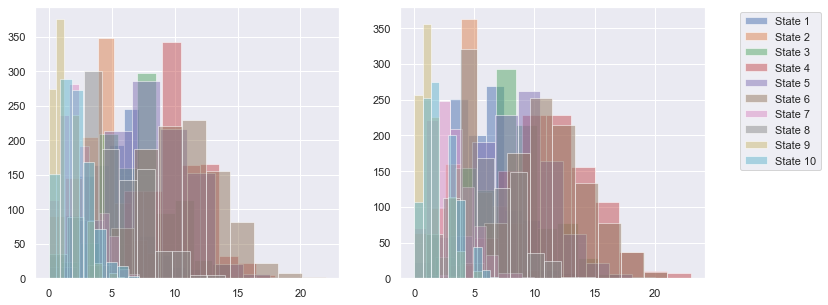

In [8]:
t = times[60]
it = np.argmin((pn.ode_output['time']-t)**2)
fig, axs = plt.subplots(1,2,figsize=(12,5))
for nps, Enps, i in zip(
    pn.sim_output['npastsum'][t],
    pn.ode_output['Expnpast'][it],
    range(0,10)
): 
    axs[0].hist(nps,label='State '+ str(i+1),alpha=0.5)
    axs[1].hist(np.random.poisson(Enps,size=nreals),label='State '+ str(i+1),alpha=0.5)
axs[1].legend(bbox_to_anchor=(1.4,1.0))
plt.show()

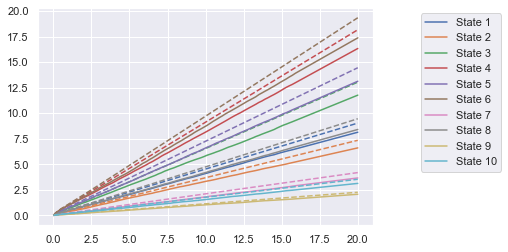

In [9]:
colours = sns.color_palette()
ncounts = []
for t in times:
    nco = np.sum(pn.sim_output['npastsum'][t],axis=1)
    ncounts.append(nco/nreals)
for i in range(0,nstat):
    plt.plot(times,np.asarray(ncounts)[:,i],label='State ' + str(i+1),color=colours[i])
    plt.plot(pn.ode_output['time'],pn.ode_output['Expnpast'][:,i],'--',color=colours[i])
plt.legend(bbox_to_anchor=(1.4,1.0))
plt.show()